In [1]:
# installing the needed Libraries
#!pip3 install -r requirements.txt

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("Mall_Customers.csv")

print(df)

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df["Gender"])

print(df)


def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def compute_distance(X, centroids):
    return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

def assign_clusters(X, centroids):
    distances = compute_distance(X, centroids)
    return np.argmin(distances, axis=0)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

X = df.values
k = 3
centroids, labels = kmeans(X, k)
print(f'Centroids: {centroids}')


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   1

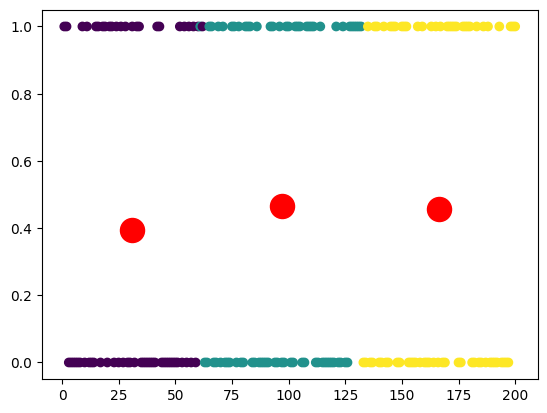

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.show()